<a href="https://colab.research.google.com/github/satheeshkumar147/NLP_Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tweets = pd.read_csv('/content/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.shape

(14640, 15)

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
mydf = tweets.loc[:,['text','airline_sentiment']]
mydf.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
mydf.text.unique()

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [ ]:
sample_text = "@VirginAmerica plus you've added commercials to the experience... tacky."

import re
import nltk
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(stop_words))

179


In [ ]:
words = sample_text.split()

[word for word in words if word not in stop_words]

['@VirginAmerica', 'plus', 'added', 'commercials', 'experience...', 'tacky.']

In [ ]:
newtext = ' '.join([word for word in words if word not in stop_words])
newtext

'@VirginAmerica plus added commercials experience... tacky.'

In [ ]:
print(sample_text)
print(newtext)

@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica plus added commercials experience... tacky.


In [ ]:
def remove_stop(text):
  text = text.lower() #conver sentence into lower case
  words = text.split()
  newtext = ' '.join([word for word in words if word not in stop_words])
  return newtext

In [ ]:
sample = "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"

remove_stop(sample)

'@americanair money, change flight, answer phones! suggestions make commitment??'

In [ ]:
print(sample)
print('*'*100)
newtext = remove_stop(sample)
print(newtext)

@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??
****************************************************************************************************
@americanair money, change flight, answer phones! suggestions make commitment??


In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub('@\w+|[^a-zA-Z\s]', ' ', text)
  text = re.sub('\s+', ' ', text)
  return(text.strip())

print(newtext)
print(clean_text(newtext))

@americanair money, change flight, answer phones! suggestions make commitment??
money change flight answer phones suggestions make commitment


In [ ]:
def preview(text):
  text = re.findall('@\w+|[^a-zA-Z\s]', text)
  return(text)

mydf['noise'] = mydf.text.apply(preview)

mynoise = set(char for sublist in mydf.noise for char in sublist)
sorted_noise = sorted(mynoise)
print(sorted_noise)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', '@', '@0xjared', '@10AM', '@12am', '@2littlebirds', '@3', '@41CGQueen', '@44Stocker', '@4geiger', '@5', '@930', '@9NEWS', '@AARP', '@ABC', '@ABC11_WTVD', '@ABCNetwork', '@ALSTDI', '@ALfamilyoffour', '@AMiltx3', '@ATWOnline', '@AUStinAirport', '@AUmilo1', '@A_Life_Story_', '@ActingOutMgmnt', '@Active_Aly', '@Adam_Karren', '@Addair', '@AdmiralsClub', '@AerocivilCol', '@AggieMensGolf', '@AirCanada', '@AirNZUSA', '@AirSouthwest', '@AirTahitiNui', '@Airbus', '@AirlineAdviser', '@AirlineGeeks', '@AlaskaAir', '@AlbertBreer', '@AllegiantTravel', '@Amagrino', '@AmericanAir', '@AmericanAirBR', '@Analystdoc', '@AndrewBiga', '@AndrewFallis', '@Andrew_Wasila', '@AnnetteNaif', '@Apollochplayers', '@ArminRosen', '@AshevilleAir', '@AshleyKAtherton', '@AskAmex', '@AskPayPal', '@AuroraBIZ', '@Australia', '@B787fans', '@BA_USA', '@BBBNE_SD_KS_IA', '@BBB_media',

In [ ]:
def final(text):
  text = clean_text(text)
  text = remove_stop(text)
  return(text)

mydf['clean_text'] = mydf.text.apply(final)
mydf.head()


,text,airline_sentiment,noise,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing


In [ ]:
from nltk.probability import FreqDist

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')

[token for word in mydf.clean_text for token in word_tokenize(word)]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['said',
 'plus',
 'added',
 'commercials',
 'experience',
 'tacky',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'another',
 'trip',
 'really',
 'aggressive',
 'blast',
 'obnoxious',
 'entertainment',
 'guests',
 'faces',
 'amp',
 'little',
 'recourse',
 'really',
 'big',
 'bad',
 'thing',
 'seriously',
 'would',
 'pay',
 'flight',
 'seats',
 'playing',
 'really',
 'bad',
 'thing',
 'flying',
 'va',
 'yes',
 'nearly',
 'every',
 'time',
 'fly',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'really',
 'missed',
 'prime',
 'opportunity',
 'men',
 'without',
 'hats',
 'parody',
 'https',
 'co',
 'mwpg',
 'grezp',
 'well',
 'amazing',
 'arrived',
 'hour',
 'early',
 'good',
 'know',
 'suicide',
 'second',
 'leading',
 'cause',
 'death',
 'among',
 'teens',
 'lt',
 'pretty',
 'graphics',
 'much',
 'better',
 'minimal',
 'iconography',
 'great',
 'deal',
 'already',
 'thinking',
 'nd',
 'trip',
 'amp',
 'even',
 'gone',
 'st',
 'trip',
 'yet',
 'p',
 'flying',
 'fabulous',
 'seductive',
 'skie

In [ ]:
all_tokens = [token for word in mydf.clean_text for token in word_tokenize(word)]
print(len(all_tokens))

131711


In [ ]:
pd.DataFrame(FreqDist(all_tokens).items(), columns = ['Tokens', 'freq']).\
sort_values(by = 'freq', ascending = False).head(25)

,Tokens,freq
29,flight,3958
188,get,1342
52,co,1214
92,http,1155
94,thanks,1083
453,cancelled,1065
236,service,967
125,help,873
37,time,794
393,customer,758


In [ ]:
#custom stoplist

stops = ['ve', 'http', 'https', 'www', 'u', 'm','s','co','i','t','w','ll','you']

def remove_customstop(text):
  text = text.lower()
  words = text.split()
  newtext = ' '.join([word for word in words if word not in stops])
  return newtext

mydf['clean'] = mydf['clean_text'].apply(remove_customstop)
mydf.head()

,text,airline_sentiment,noise,clean_text,clean
0,@VirginAmerica What @dhepburn said.,neutral,"[@VirginAmerica, @dhepburn, .]",said,said
1,@VirginAmerica plus you've added commercials t...,positive,"[@VirginAmerica, ', ., ., ., .]",plus added commercials experience tacky,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,"[@VirginAmerica, ', ., ., ., !]",today must mean need take another trip,today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,"[@VirginAmerica, ', "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,"[@VirginAmerica, ']",really big bad thing,really big bad thing


In [ ]:
all_tokens = [token for word in mydf.clean for token in word_tokenize(word)]
pd.DataFrame(FreqDist(all_tokens).items(), columns = ['Tokens', 'freq']).\
sort_values(by = 'freq', ascending = False).head(25)

,Tokens,freq
29,flight,3958
184,get,1342
90,thanks,1083
449,cancelled,1065
232,service,967
121,help,873
37,time,794
389,customer,758
352,us,705
210,hours,684


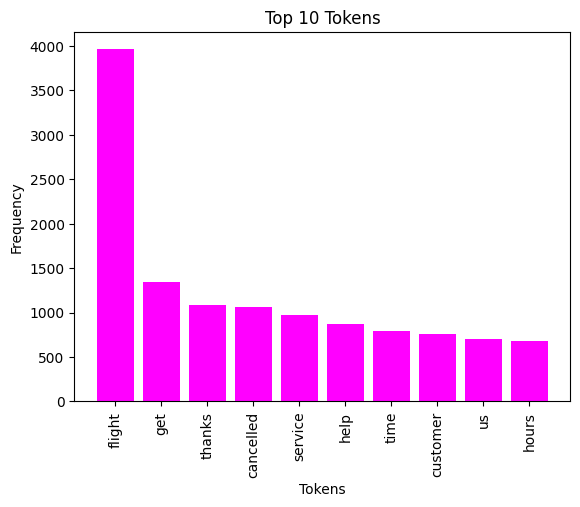

In [ ]:
all_tokens = [token for word in mydf.clean for token in word_tokenize(word)]

freqdf = pd.DataFrame(FreqDist(all_tokens).items(), columns = ['Tokens', 'freq']).\
sort_values(by = 'freq', ascending = False)

plt.bar(freqdf.Tokens[:10], freqdf.freq[:10], color='magenta')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Tokens')
plt.xticks(rotation = 90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

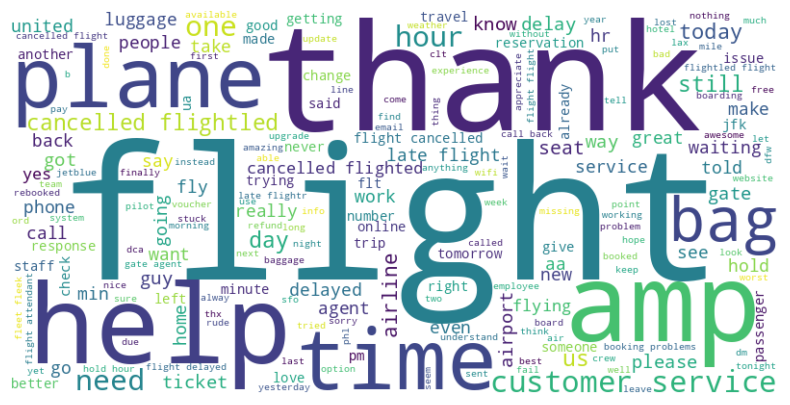

In [ ]:
#word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').\
generate(' '.join(all_tokens))

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

### Text Preprocessing

* Stopwords
* Created a List of the Noisy Elements
* Clean the Data using Regex (Regex101)
* Frequency Table of the Tokens
* Custom Stoplist to remove what is left over
*Top 10 Tokens Frequency Distribution
* Word Cloud

### Model Building Stage

* CountVectorizer(Bag of Words)
* TFIDF
#### compare the results

In [ ]:
mydf.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
mapped = {'negative':2, 'neutral':0, 'positive':1}
mydf['Target'] = mydf.airline_sentiment.map(mapped)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = mydf.clean
y = mydf.Target
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20,
                                                random_state = 42)

In [ ]:
xtrain

,clean
750,offering us rooms people fail
6875,jfk nyc staff amazing lax jetblue sending emai...
7598,well last update right direction least keep fi...
14124,flight still sitting dfw waiting baggage loaded
6187,companion pass broken today purchase error inv...
...,...
5191,replacing beer bravo cheers
13418,lax service reps hand number call helpful
5390,hold hour chance someone help
860,would contact discuss poor experiences custome...


In [ ]:
vectorizer = CountVectorizer()

xtrain_cv = vectorizer.fit_transform(xtrain)
xtest_cv = vectorizer.transform(xtest)

In [ ]:
#Model & Generate the Classification Report

model = LogisticRegression()
model.fit(xtrain_cv, ytrain)
ypred = model.predict(xtest_cv)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       580
           1       0.76      0.68      0.72       459
           2       0.85      0.89      0.87      1889

    accuracy                           0.79      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.79      0.79      2928



In [ ]:
model = RandomForestClassifier()
model.fit(xtrain_cv, ytrain)
ypred = model.predict(xtest_cv)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.58      0.48      0.53       580
           1       0.71      0.62      0.66       459
           2       0.82      0.89      0.85      1889

    accuracy                           0.77      2928
   macro avg       0.70      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



In [ ]:
tfidf = TfidfVectorizer()

xtrain_tfidf = tfidf.fit_transform(xtrain)
xtest_tfidf = tfidf.transform(xtest)

model = LogisticRegression()

model.fit(xtrain_tfidf, ytrain)
ypred = model.predict(xtest_tfidf)

print(classification_report(ytest, ypred))
#

              precision    recall  f1-score   support

           0       0.67      0.43      0.52       580
           1       0.83      0.62      0.71       459
           2       0.81      0.94      0.87      1889

    accuracy                           0.79      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.78      0.79      0.78      2928



In [ ]:
rf = RandomForestClassifier(criterion = 'entropy')

rf.fit(xtrain_tfidf, ytrain)
ypred = rf.predict(xtest_tfidf)

print(classification_report(ytest, ypred))
#

              precision    recall  f1-score   support

           0       0.62      0.44      0.51       580
           1       0.75      0.59      0.66       459
           2       0.80      0.92      0.86      1889

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



* In comparison to Count Vectorizer, TFIDF is much better

* TFIDF works on Frequency where as CountVectorizer is the Bag of Words and hence treats all the words separately.

* where in tfidf fails where the frequency become same.

* what can be a better text processing fn

* word embeddings models - Word2Vec Model, FastText, Gensim Model

In [ ]:
import gensim.downloader as api

model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Most Similar.....
model.most_similar([model['king']],topn = 10)

[('king', 1.0),
 ('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953)]

In [ ]:
model['king']

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 